Visually representing the content of a text document is one of the most important tasks in the field of text mining. ... For example, many text visualizations do not represent the text directly, they represent an output of a language model(word count, character length, word sequences, etc.).

### Following activities are performed
1. PRE PROCESSING
2. MODELLING
3. POST PROECESSING
4. PRESENTATION

####  ACCESS --> TOKENIZE --> NORMALIZE  --> STOP WORD --> FEATURING TABLE --> VISULAIZATION
    BS4        SPLIT()      LOWER()          CREATE              COUNTER SORT       TABLE ==> | WORD | FREQUECNY |
    URL LIB                                  SW LIST                                BAR CHARTS
                                                                                    WORD CLOUD

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#create some functions for cleaning and counting
def wordfreq(words):
    """Function to generated the frequency distribution of the given text"""
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
        #print(word_freq)
    return word_freq
def sort_tokens(tokens):
    import operator
    sorted_d = sorted(tokens.items(), key=operator.itemgetter(1),reverse=True)
    #print('Dictionary in descending order by value : ',sorted_d)
    #print(sorted_d[:25])
    return(sorted_d)

In [3]:
def plot_wordcloud(wordcloud):
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [4]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

### 73rd-independence-day-2019-full-text-of-narendra-modis-red-fort-speech

In [5]:
#Clean text??
from urllib.request import urlopen
response = urlopen('https://www.livemint.com/news/india/73rd-independence-day-2019-live-updates-pm-narendra-modi-delivers-speech-from-red-fort-1565763102454.html')
html = response.read()
print(len(html))
tokens_modi = [tok for tok in html.split()]
#print("Total no of tokens :"+ str(len(tokens_py)))
#print(tokens_py[0:100])

151094


In [6]:
#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')
#print(soup.get_text())
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract() 
#print(soup.get_text())

Calling BS4


In [7]:
#Get the token
tokens_modi = [tok for tok in soup.get_text().split()]
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
tokens_modi_clean = []
for token in tokens_modi:
    if token in stop_words:
        pass
    else:
        tokens_modi_clean.append(token.replace('.', '').strip())
#print(tokens_clean) 

In [8]:
print(tokens_modi[0:100])

['PM', "Modi's", 'Independence', 'Day', 'speech', 'highlights:', 'India', 'can', 'be', 'a', '$5', 'trillion', 'economy', 'in', '5', 'years', 'Explore', 'e-paperNew', 'Saturday,', '7', 'September', '2019', 'Log', 'in/Sign', 'up', 'Search', 'e-paperNew', 'Notifications99', 'Top', 'Sections', 'Company', 'Results', 'Companies', 'NewsStart-upsCompany', 'ResultsPeople', 'Start-ups', 'Mint', '50', '-', 'Top', 'Mutual', 'Funds', 'Technology', 'GadgetsTech', 'ReviewsApp', 'NewsFoldable', 'Smartphones5G', 'Tech', 'Markets', 'Stock', 'MarketsCommoditiesMark', 'To', 'MarketIPOLive', 'Blog', 'Money', 'Personal', 'FinanceQ&A', 'Mutual', 'Funds', 'Mint', '50', '-', 'Top', 'Mutual', 'FundsNews', 'Insurance', 'Industry', 'BankingInfotechInfrastructureAgricultureManufacturingEnergyRetail', 'Opinion', 'ViewsColumnsBlogs', 'Politics', 'Lounge', 'FeaturesBusiness', 'of', 'Life', 'Photos', 'Videos', 'Mint', 'ExplainersMarket', 'AnalysisWhy', 'Not', 'Mint', 'MoneyBusiness', 'of', 'EntertainmentLong', 'Story'

In [9]:
new_tokens = wordfreq(tokens_modi)

In [10]:
#Sort the dcitionary on the basis of word freuqncy
data = sort_tokens(new_tokens)

In [11]:
#print('Dictionary in descending order by value : ',sorted_d)
print(data)

[('the', 84), ('of', 38), ('to', 34), ('in', 32), ('pm', 24), ('am:', 23), ('a', 22), ('modi', 19), ('for', 17), ('and', 16), ('independence', 15), ('on', 13), ('trillion', 12), ('are', 12), ('be', 11), ('with', 10), ('we', 10), ('country', 10), ('says', 10), ('day', 9), ('prime', 9), ('narendra', 9), ('will', 9), ('is', 9), ('can', 8), ('minister', 8), ('his', 8), ('people', 8), ('india', 7), ('economy', 7), ('nation', 7), ('that', 7), ('was', 7), ('also', 7), ('our', 7), ('$5', 6), ('article', 6), ('new', 6), ('this', 6), ('mint', 5), ('red', 5), ('70', 5), ('said', 5), ('at', 5), ('have', 5), ('been', 5), ('has', 5), ('had', 5), ('speech', 4), ('up', 4), ('top', 4), ('mutual', 4), ('not', 4), ('2019,', 4), ('about', 4), ('one', 4), ('five', 4), ('years.', 4), ('became', 4), ('economy.', 4), ('before', 4), ('just', 4), ('country.', 4), ('by', 4), ('taken', 4), ('government', 4), ('us', 4), ("modi's", 3), ('5', 3), ('years', 3), ('2019', 3), ('50', 3), ('-', 3), ('day.', 3), ('sixth',

In [12]:
#Create a Pandas dataframe for word frequency
word_frequency = pd.DataFrame(data, columns = ['word', 'frequency'])

In [13]:
#Tabular data
word_frequency.head(25)

,word,frequency
0,the,84
1,of,38
2,to,34
3,in,32
4,pm,24
5,am:,23
6,a,22
7,modi,19
8,for,17
9,and,16


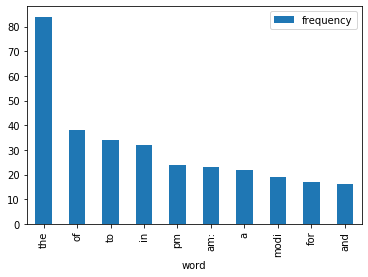

In [14]:
#Word frequency as bar chart
word_frequency[0:10].plot.bar('word', 'frequency')

In [15]:
#Get cleaned tokens
#Get the token
tokens = [tok for tok in soup.get_text().split()]
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because', 'am', 'pm','says']
tokens_modi_clean = []
for token in tokens:
    if token in stop_words:
        pass
    else:
        tokens_modi_clean.append(token)

#normalizing the data in tokens cleaned
fnTokens = []
for token in tokens_modi_clean:
    fnTokens.append(token.lower())

In [16]:
new_tokens = wordfreq(tokens_modi_clean)
data = sort_tokens(new_tokens)
print(data[:25])

[('pm', 24), ('am:', 23), ('modi', 19), ('independence', 15), ('on', 13), ('trillion', 12), ('with', 10), ('country', 10), ('day', 9), ('prime', 9), ('narendra', 9), ('will', 9), ('can', 8), ('minister', 8), ('his', 8), ('people', 8), ('india', 7), ('economy', 7), ('nation', 7), ('was', 7), ('also', 7), ('$5', 6), ('article', 6), ('new', 6), ('mint', 5)]


In [17]:
#Create a Pandas dataframe for word frequency
word_frequency = pd.DataFrame(data, columns = ['word', 'frequency'])

In [18]:
print(tokens_modi_clean[0:20])

['PM', "Modi's", 'Independence', 'Day', 'speech', 'highlights:', 'India', 'can', '$5', 'trillion', 'economy', '5', 'years', 'Explore', 'e-paperNew', 'Saturday,', '7', 'September', '2019', 'Log']


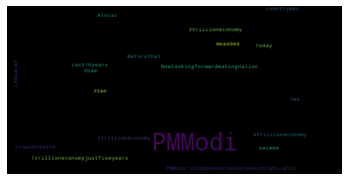

In [19]:
#Visualize word frequency
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(''.join(tokens_modi_clean))
plot_wordcloud(wordcloud)